smote 0.2로 사용한 2차 데이터 처리
train 먼저 진행후, 높은 정확도 보이는 test 데이터 한해서 학습 진행 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [87]:
csv_data = r"healthcare-dataset-stroke-data.csv"
df = pd.read_csv(csv_data)
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [88]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['avg_glucose_level'] = df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean())
df['age'] = df['age'].fillna(df['age'].mean()).round()

df['hypertension'] = df['hypertension'].apply(lambda x: 1 if x == 1 else 0)
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x == 1 else 0)
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 0, 
    'smokes': 1, 
    'formerly smoked': 0, 
    'Unknown': 0.5
})
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

df = df.drop_duplicates()

df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,1,228.69,36.600000,0.0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,0,202.21,28.893237,0.0,1
2,31112,Male,80.0,0,1,Yes,Private,0,105.92,32.500000,0.0,1
3,60182,Female,49.0,0,0,Yes,Private,1,171.23,34.400000,1.0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,0,174.12,24.000000,0.0,1
5,56669,Male,81.0,0,0,Yes,Private,1,186.21,29.000000,0.0,1
6,53882,Male,74.0,1,1,Yes,Private,0,70.09,27.400000,0.0,1
7,10434,Female,69.0,0,0,No,Private,1,94.39,22.800000,0.0,1
8,27419,Female,59.0,0,0,Yes,Private,0,76.15,28.893237,0.5,1
9,60491,Female,78.0,0,0,Yes,Private,1,58.57,24.200000,0.5,1


In [89]:
# 범주형 및 수치형 컬럼 분리
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
# 입력 데이터(X) 및 타겟 데이터(y) 설정
y = df['stroke']
X = df[categorical_columns + numerical_columns]

In [90]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)
X_transformed = preprocessor.fit_transform(X)


In [91]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)  # X_transformed는 PCA가 적용된 데이터
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE로 소수 클래스 증강 (sampling_strategy 0.3 설정)
sampling_strategy = 0.2  # 변수로 설정
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인
print("Original y_train distribution:", pd.Series(y_train).value_counts())
print("Resampled y_train distribution:", pd.Series(y_resampled).value_counts())

Original y_train distribution: stroke
0    3403
1     174
Name: count, dtype: int64
Resampled y_train distribution: stroke
0    3403
1     680
Name: count, dtype: int64


일단 그래프 그려보고 ,차원 축소 해야 하는지 확인

In [93]:
from sklearn.decomposition import PCA
# PCA를 사용해 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_resampled)
X_test_2d = pca.transform(X_test)



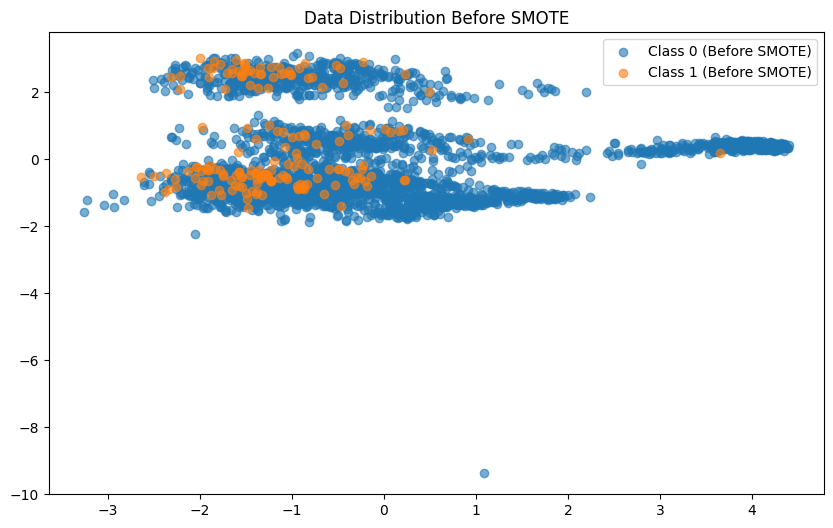

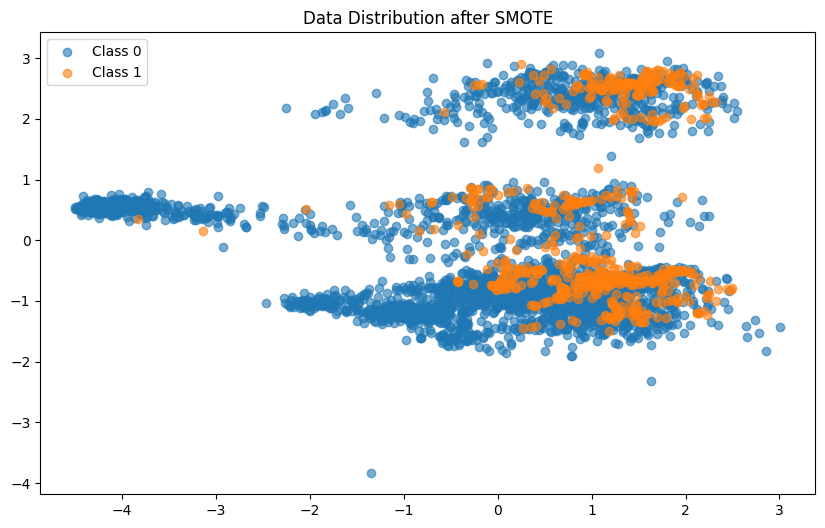

In [114]:
X_pca = pca.fit_transform(X_resampled)

X_train_pca = PCA(n_components=2).fit_transform(X_train)
plt.figure(figsize=(10, 6)) 
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label="Class 0 (Before SMOTE)", alpha=0.6)
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label="Class 1 (Before SMOTE)", alpha=0.6)
plt.title("Data Distribution Before SMOTE")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_resampled == 0, 0], X_pca[y_resampled == 0, 1], label="Class 0", alpha=0.6)
plt.scatter(X_pca[y_resampled == 1, 0], X_pca[y_resampled == 1, 1], label="Class 1", alpha=0.6)
plt.title("Data Distribution after SMOTE")
plt.legend()
plt.show()

In [95]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
# Perceptron 모델 학습 (SMOTE 데이터 사용)
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42, class_weight='balanced')
perceptron.fit(X_train_2d, y_resampled) 

# 훈련 데이터 정확도 계산
train_accuracy = accuracy_score(y_resampled, perceptron.predict(X_train_2d))
print("train_accuracy", train_accuracy)


train_accuracy 0.7697771246632378


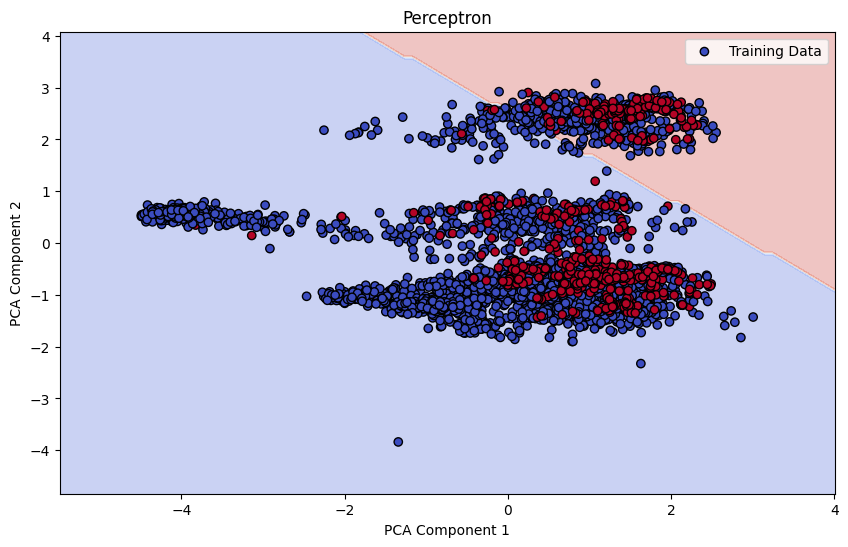

In [96]:
# 결정 경계 시각화
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100)
)
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("Perceptron")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [97]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier."""
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [98]:
# AdalineGD 학습
y_resampled_adaline = np.where(y_resampled == 0, -1, 1)

adaline_gd = AdalineGD(eta=0.01, n_iter=50, random_state=42)
adaline_gd.fit(X_train_2d, y_resampled_adaline)

# AdalineGD 정확도 계산 (Train 데이터만)
train_accuracy_gd = accuracy_score(y_resampled, adaline_gd.predict(X_train_2d))
print(f"AdalineGD Training Accuracy: {train_accuracy_gd:.4f}")

AdalineGD Training Accuracy: 0.0125


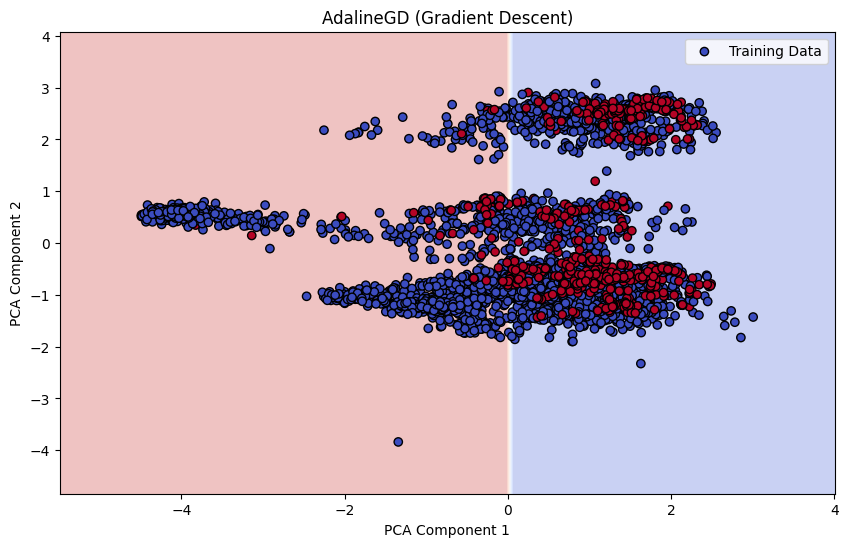

In [99]:
# AdalineGD 결정 경계 시각화
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100)
)
Z = adaline_gd.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("AdalineGD (Gradient Descent)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [100]:
from sklearn.linear_model import SGDClassifier
# AdalineSGD 학습
adaline_sgd = SGDClassifier(loss="log_loss", learning_rate="optimal", random_state=42)
adaline_sgd.fit(X_train_2d, y_resampled)

# AdalineSGD 정확도 계산 (Train 데이터만)
train_accuracy_sgd = accuracy_score(y_resampled, adaline_sgd.predict(X_train_2d))
print(f"AdalineSGD Training Accuracy: {train_accuracy_sgd:.4f}")


AdalineSGD Training Accuracy: 0.8335


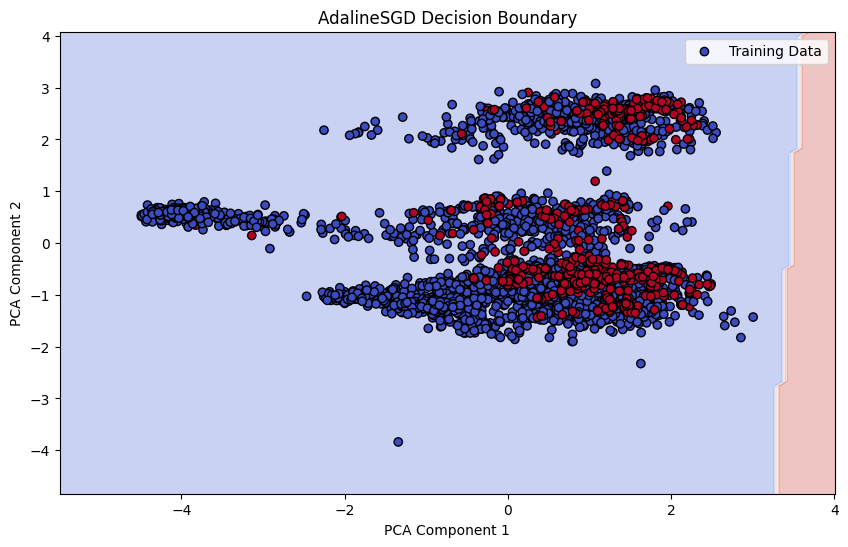

In [101]:
# AdalineSGD 결정 경계 시각화
Z = adaline_sgd.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("AdalineSGD Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 모델 학습 (PCA 적용된 오버샘플링된 훈련 데이터 사용)
log_reg.fit(X_train_2d, y_resampled)  # y_train_oversampled 사용

# 훈련 데이터 정확도 계산
y_train_pred = log_reg.predict(X_train_2d)
train_accuracy = accuracy_score(y_resampled, y_train_pred)  # y_train_oversampled 사용
print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")

Logistic Regression Training Accuracy: 0.8283


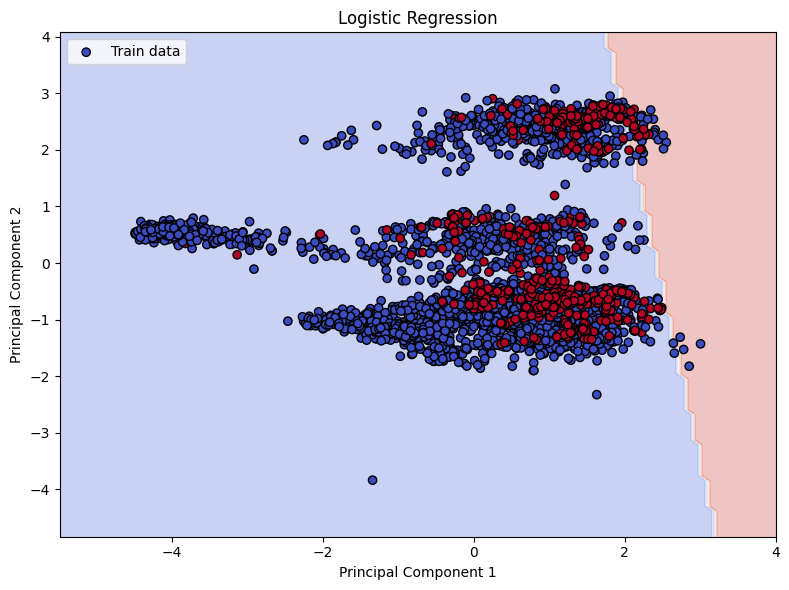

In [103]:
plt.figure(figsize=(8, 6))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label='Train data')

plt.title('Logistic Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_resampled)
train_accuracy_knn = accuracy_score(y_resampled, knn.predict(X_train_2d))

print("train_accuracy_knn", train_accuracy_knn)


train_accuracy_knn 0.8880724957139359


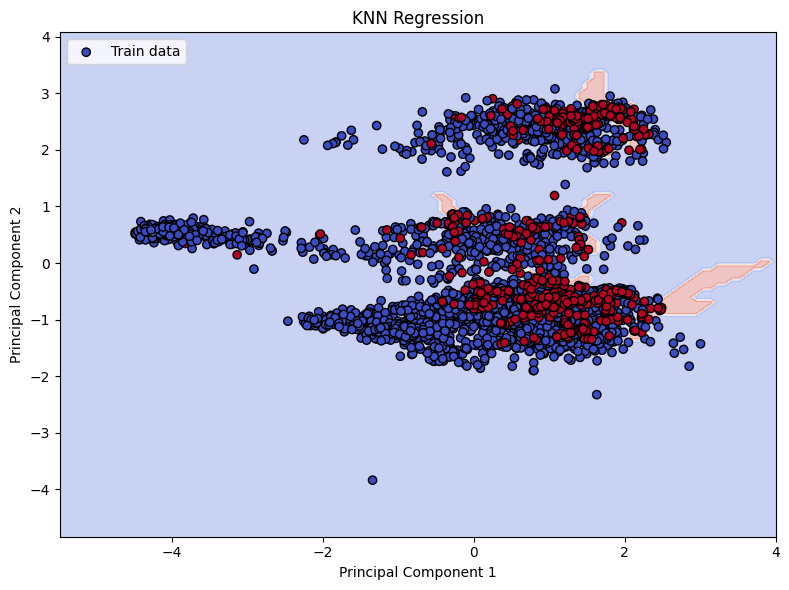

In [105]:
plt.figure(figsize=(8, 6))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label='Train data')

plt.title('KNN Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [106]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,             # 최대 트리 깊이를 제한하여 과적합 방지
    min_samples_split=10,    # 분할에 필요한 최소 샘플 수를 설정
    min_samples_leaf=5       # 리프 노드에 있어야 하는 최소 샘플 수를 설정
)
dt.fit(X_train_2d, y_resampled)
train_accuracy_dt = accuracy_score(y_resampled, dt.predict(X_train_2d))

print("train_accuracy_dt",train_accuracy_dt)

train_accuracy_dt 0.8420279206465834


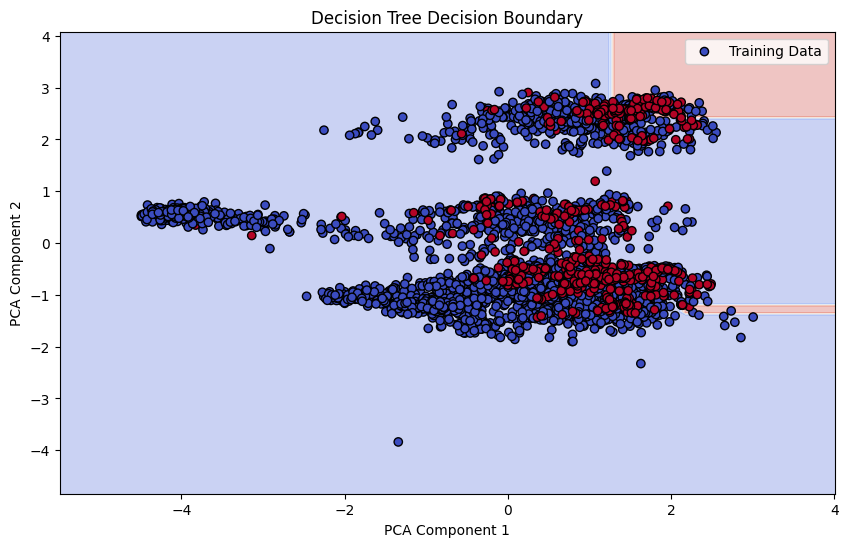

In [107]:
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("Decision Tree Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [108]:
# SVM
from sklearn.svm import SVC

svm = SVC(random_state=42, kernel='rbf', class_weight='balanced')
svm.fit(X_train_2d, y_resampled)
train_accuracy_svm = accuracy_score(y_resampled, svm.predict(X_train_2d))

print("train_accuracy_svm",train_accuracy_svm)


train_accuracy_svm 0.6250306147440607


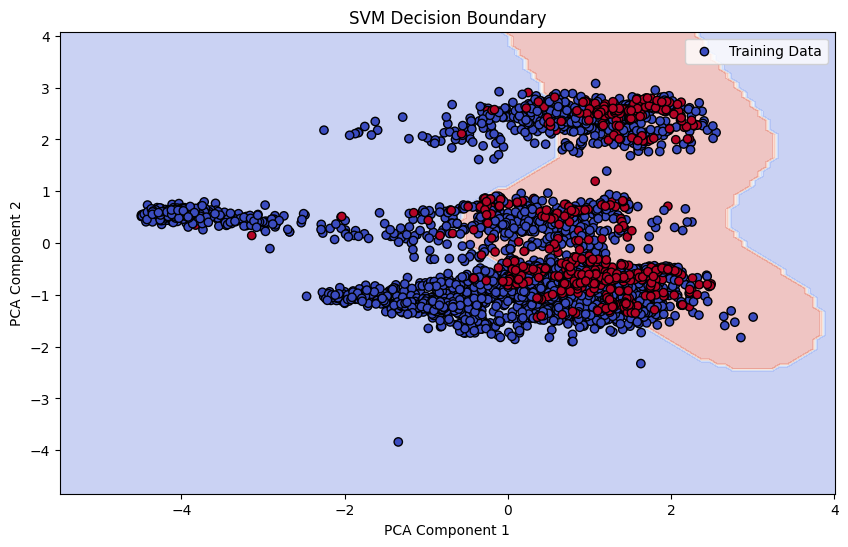

In [109]:
# AdalineSGD 결정 경계 시각화
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("SVM Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.show()

adaline sgd
logistic regression
knn
decision tree

Adaline - SGD Test Accuracy: 0.9439


C:\Users\LYJ\AppData\Local\Temp\ipykernel_22524\1069892338.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')


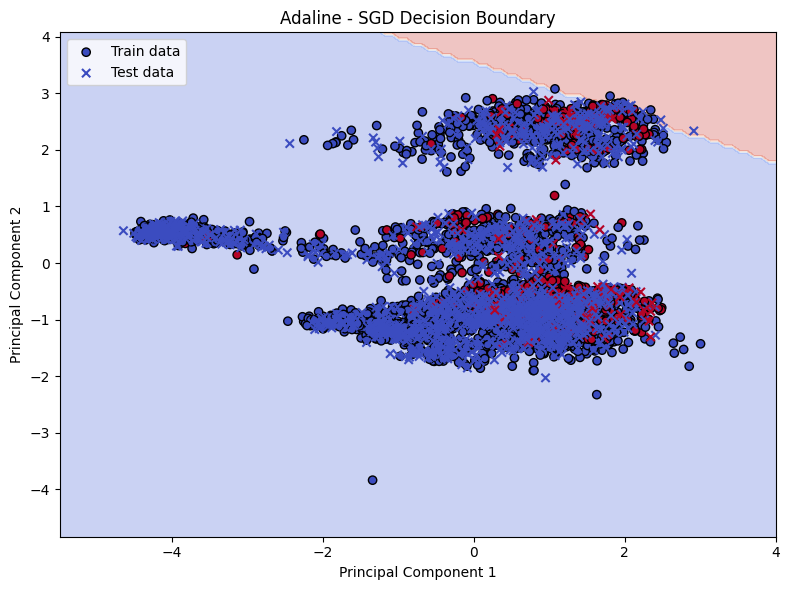

In [110]:
from sklearn.linear_model import SGDClassifier

adaline_sgd = SGDClassifier(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)
adaline_sgd.fit(X_train_2d, y_resampled)
test_accuracy_adaline_sgd = accuracy_score(y_test, adaline_sgd.predict(X_test_2d))
print(f"Adaline - SGD Test Accuracy: {test_accuracy_adaline_sgd:.4f}")

Z = adaline_sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Adaline - SGD Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Logistic Regression Test Accuracy: 0.9419


C:\Users\LYJ\AppData\Local\Temp\ipykernel_22524\1866723856.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')


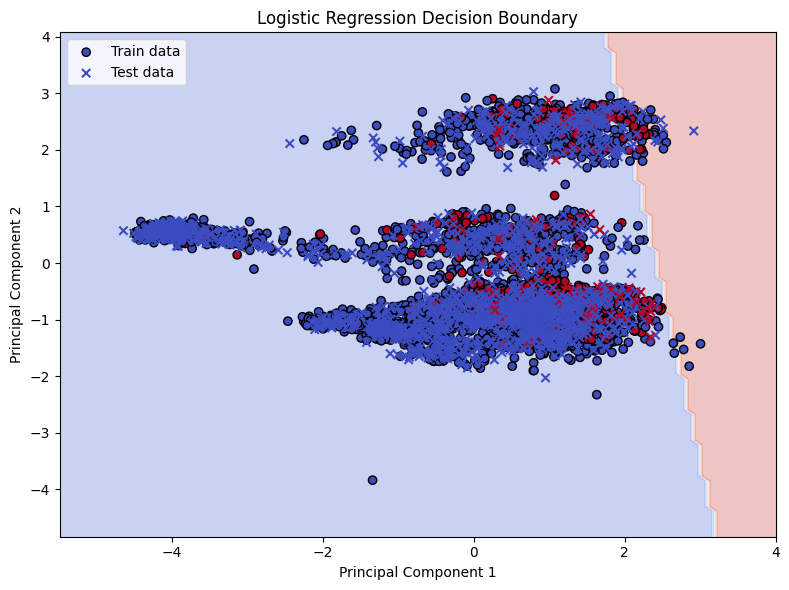

In [111]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_2d, y_resampled)
test_accuracy_log_reg = accuracy_score(y_test, log_reg.predict(X_test_2d))
print(f"Logistic Regression Test Accuracy: {test_accuracy_log_reg:.4f}")

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


KNN Test Accuracy: 0.8911


C:\Users\LYJ\AppData\Local\Temp\ipykernel_22524\3003422582.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')


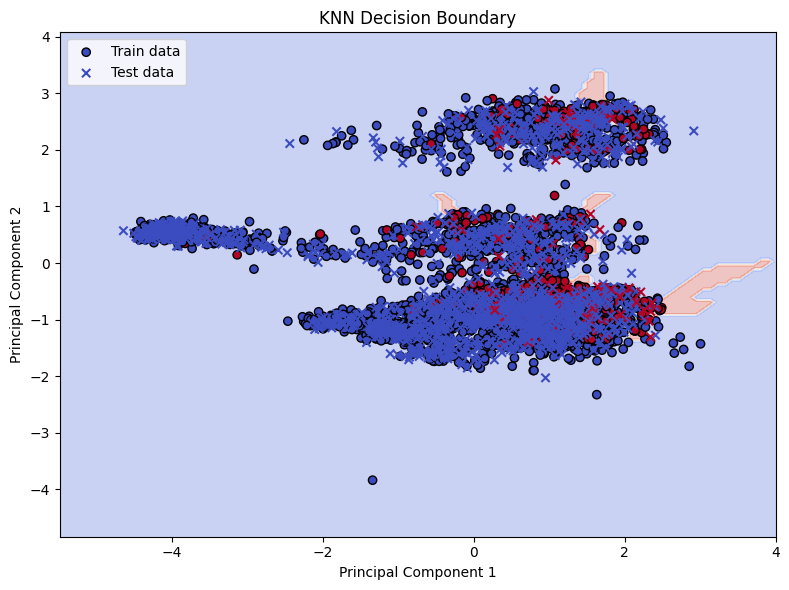

In [112]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_resampled)
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test_2d))
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}")

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Decision Tree Test Accuracy: 0.8519


C:\Users\LYJ\AppData\Local\Temp\ipykernel_22524\3493430952.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')


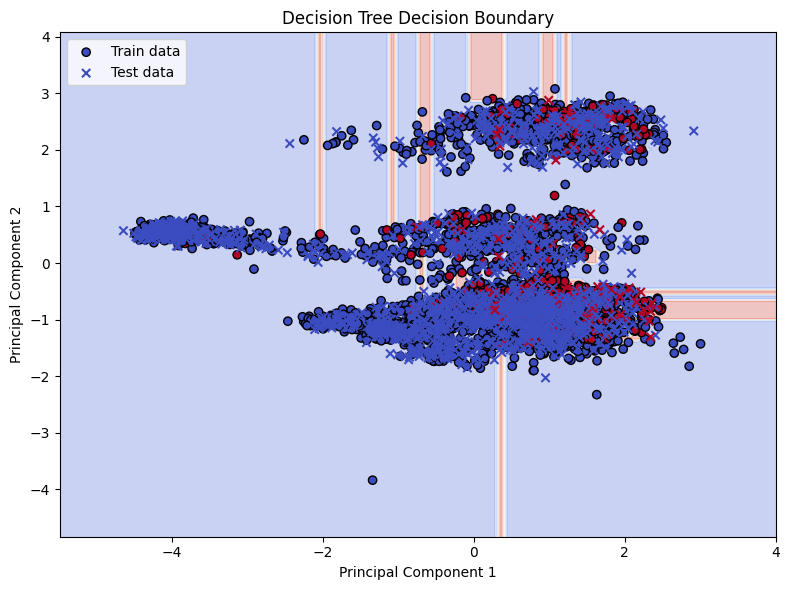

In [113]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_2d, y_resampled)
test_accuracy_decision_tree = accuracy_score(y_test, decision_tree.predict(X_test_2d))
print(f"Decision Tree Test Accuracy: {test_accuracy_decision_tree:.4f}")

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_resampled, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()